In [2]:
import sys
sys.path.append("..")
from src.data_utils import *

df = load_data("../data/benin_raw.csv")
df = drop_high_missing(df)

df = clean_outliers(df, zscore_columns=["GHI", "ModA", "ModB"], clip_columns=["DHI", "WS", "WSgust"])
df = clean_limit(df)
df_clean = df.copy()
    
df = finalize_clean(df)
save_clean(df, "../data/benin_clean(2).csv")

df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.00000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000,525492.000000
mean,241.747997,167.317378,116.511942,236.393718,228.686788,28.179206,54.485286,2.108808,2.79287,0.473359,153.425756,8.581511,994.196836,0.000923,0.001905,35.240368,32.467492
std,329.807111,261.427524,156.121020,326.641186,316.269297,5.924778,28.075067,1.557045,1.96587,0.273400,102.334846,6.385669,2.475020,0.030366,0.037119,14.803271,12.346262
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.30000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.500000,4.400000,4.300000,28.000000,55.100000,1.900000,2.60000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.000000,313.800000,216.200000,463.300000,447.600000,32.300000,80.100000,3.100000,4.10000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1233.000000,952.300000,574.000000,1205.100000,1175.000000,43.800000,100.000000,6.500000,8.40000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


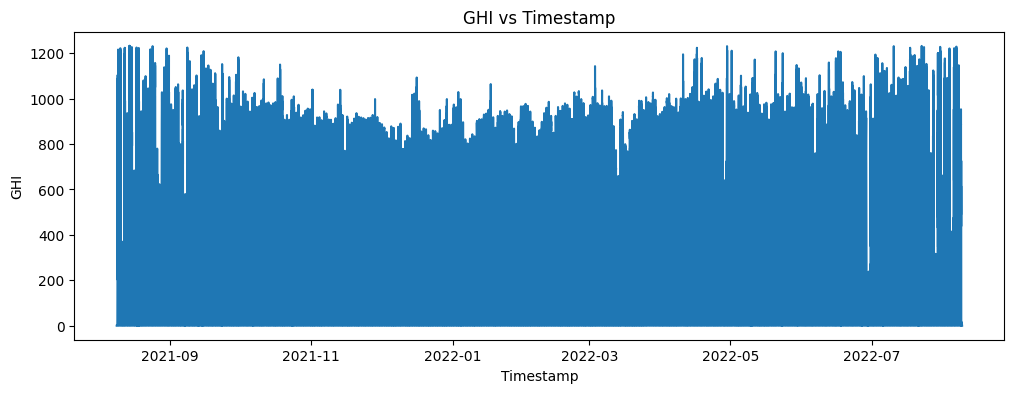

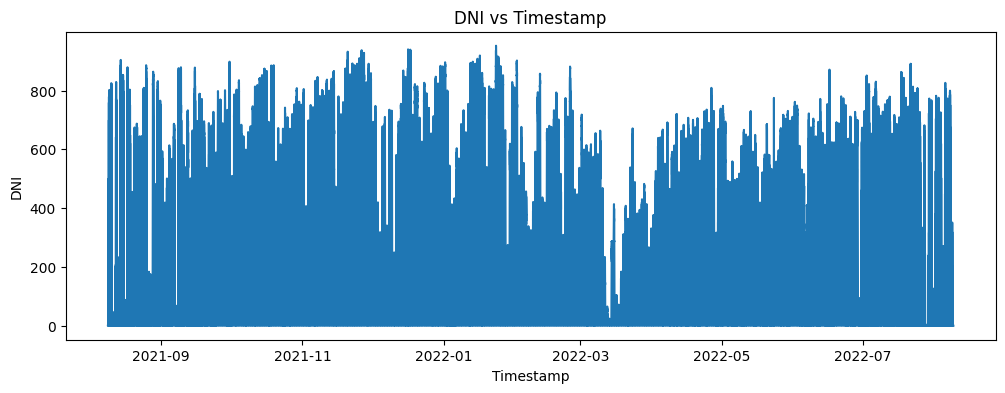

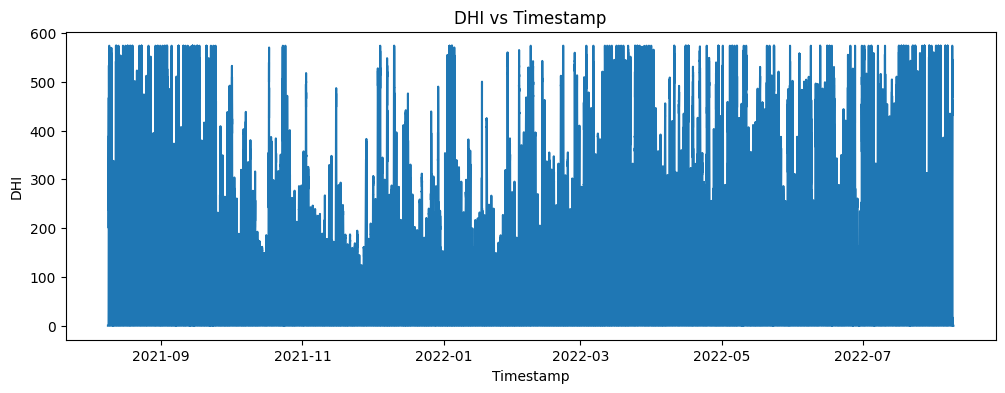

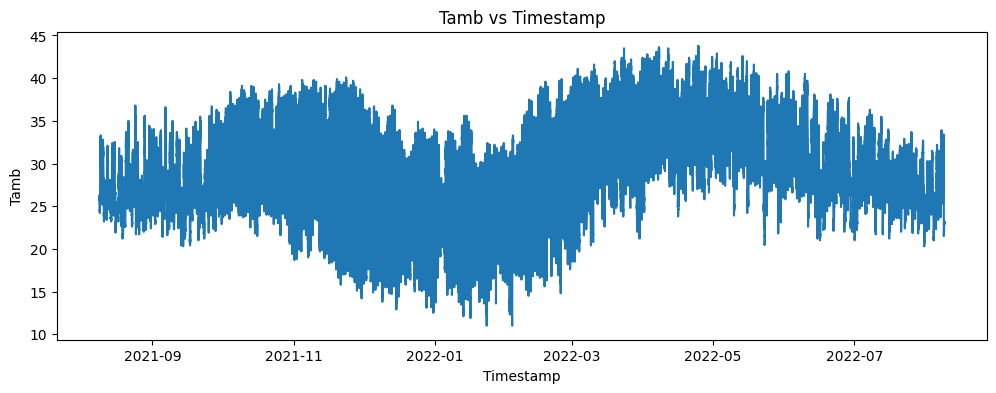

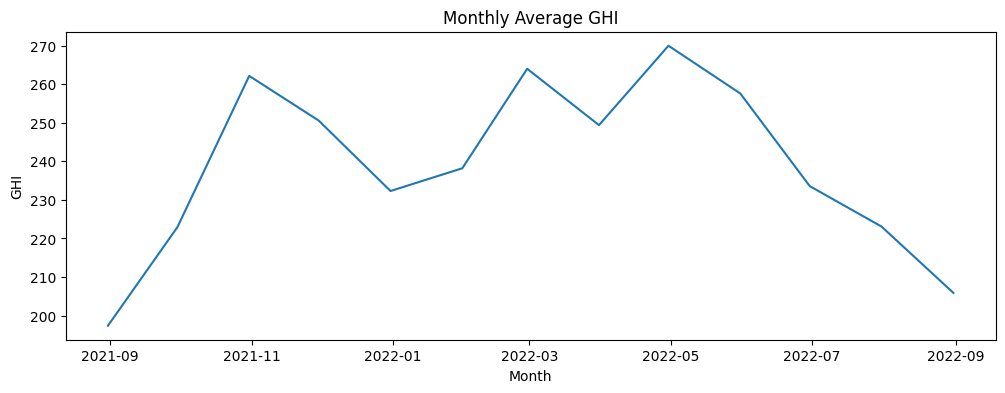

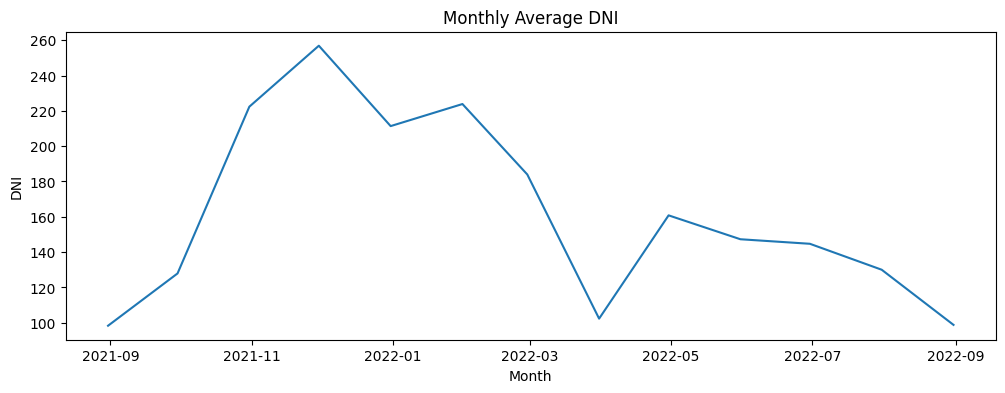

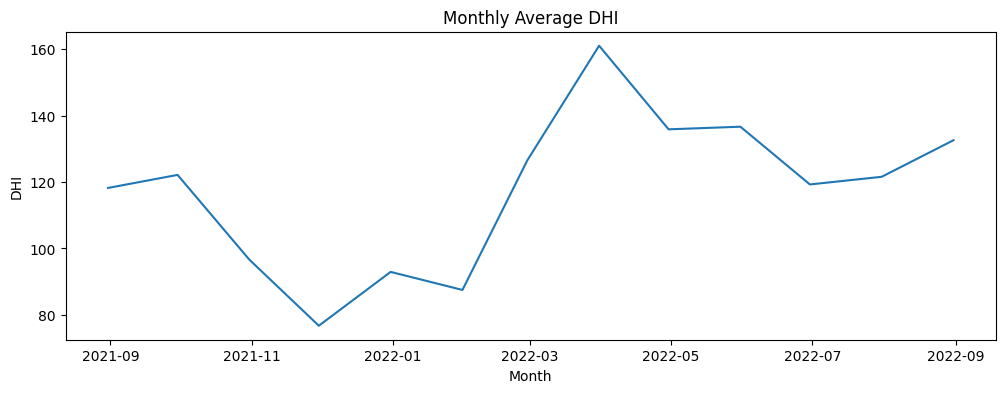

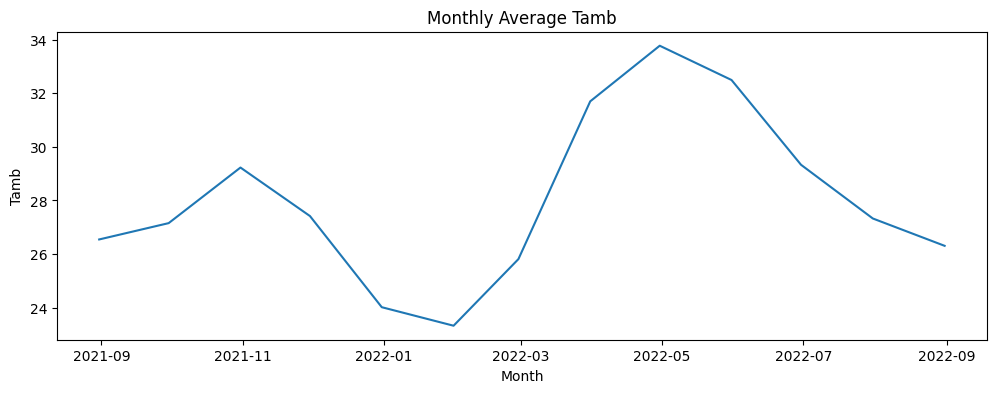

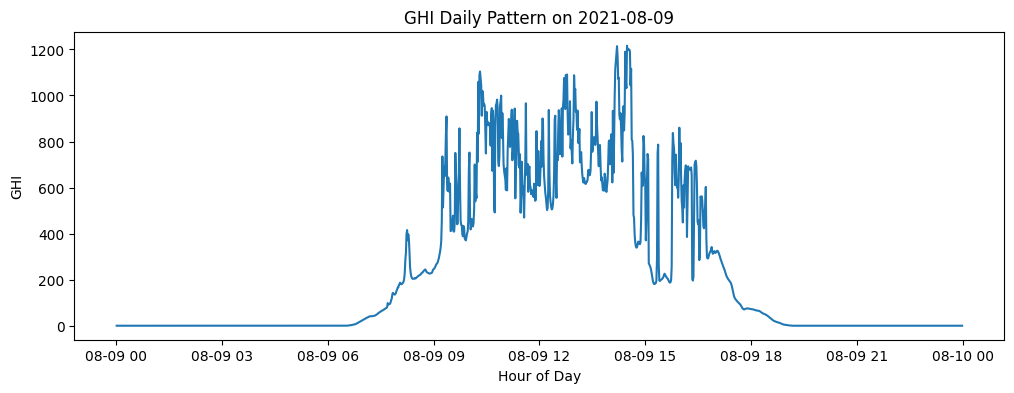

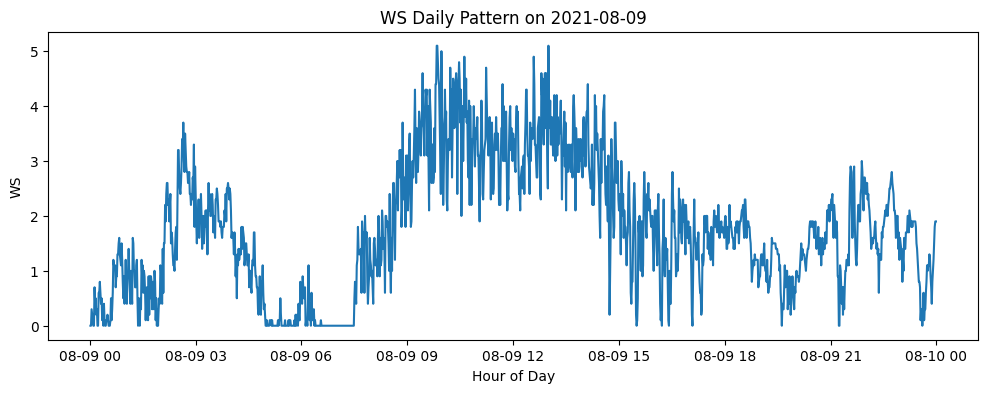

In [4]:
import sys
sys.path.append("..")

import pandas as pd
from src.plot_utils import *

df = pd.read_csv("../data/benin_clean(2).csv", parse_dates=['Timestamp'])
df = df.set_index('Timestamp')
df = df.sort_index()

df.head()

plot_time_series(df, ['GHI', 'DNI', 'DHI', 'Tamb'])
plot_monthly_average(df, ['GHI', 'DNI', 'DHI', 'Tamb'])
plot_daily_pattern(df, "GHI")
plot_daily_pattern(df, "WS")

